<a href="https://colab.research.google.com/github/pinballsurgeon/sweeping_analysis/blob/main/emergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## installs

In [1]:
!pip install pytrends
!pip install joypy

# install openai
!pip install openai

## imports

In [2]:
import numpy
import pandas 

from pytrends.request import TrendReq
from pytrends         import dailydata
import pytrends
from operator         import index

import joypy
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn 

import openai

# supply openai api key via file 
openai.api_key = open('openai_key').read()


## seed config

In [3]:
# configurations
config_dict = { 'analysis_start_year'  : 2021
              , 'analysis_start_month' : 1
              , 'analysis_end_year'    : 2021
              , 'analysis_end_month'   : 2
              , 'analysis_country'     : 'US' }


# seed topics
topics = ['flipflops', 'pumpkin', 'turkey', 'baseball', 'basketball', 'football', 'kite', 'ice cream', 'hotdog', 'rocket', 'fireworks', 'pizza', 'bbq', 'parade']



In [4]:
# for a given list of topics, return dataframe of interests from pytrend
def get_trend_frame(topics, years):

  # initialize return frame
  df_total = pandas.DataFrame()

  # for each provided 
  for topic in topics:

    # pytrend request
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=[topic]
                         ,timeframe=( 'today %s-y' % (years)))
    
    # load trend request
    df = pytrend.interest_over_time()

    # add column for new topic
    df_total[topic] = df[topic]

  # drop nans
  df_total = df_total.dropna()

  # return standard frame
  return df_total

In [5]:
df_total = get_trend_frame(topics, '5')


In [6]:
# capture features
df_features = df_total[topics]

# normalize
df_features=(df_features-df_features.mean())/df_features.std()

In [7]:

# normalize it all history (meanly)
df_total = (df_total-df_total.mean())/df_total.std()
df_features_recent = df_total[df_total.index > '1/1/2010']

# normalize it recent history (meanly)
df_features_recent = (df_features_recent-df_features_recent.mean())/df_features_recent.std()

# group by week, average occurences
df_agg = df_features
df_agg_recent = df_features_recent


In [ ]:
# initialize buffers resources
df_stk=pandas.DataFrame()
globalst=[]

# navigate hierarchy, each combination of WEEKNUM and TOPIC
for col in df_agg:                      # topic
    for val in df_agg.index.weekofyear: # weeknum



        # time sensitive
        fs_val = df_agg[col][val]                   # full spectrum
        

              

        # iterate through each instance of max bin occurence, determining number of weeks written
        for x in range(0,int(abs(fs_val) * 100)):
        
        
            # full source
            if fs_max_src == 'full':
                
                if sec_i < int(abs(fs_min) * 100):
                
                    lst=[val, val, col]
                    globalst.append(lst)
                
                else:
                    
                    lst=[val, None, col]
                    globalst.append(lst)                    
                
            # recent source
            if sec_i < int(abs(fs_min) * 100):
                
                lst=[val, val, col]
                globalst.append(lst)
                
            else:
                    
                lst=[None, val, col]
                globalst.append(lst)                     
                
                
            sec_i+=1
            #print(sec_i)
            #print(df_agg[col][val])
            #print(df_agg_recent[col][val])
            
            
            #lst=[val, col]
            globalst.append(lst)
    

    #df_stk=df_stk.append(lst)

df_flat = pandas.DataFrame(globalst
                      ,columns=['WeekNum'
                               ,'WeekNum_Rct'
                               ,'Flower_Tot'])

In [8]:
# initialize buffers resources
df_stk=pandas.DataFrame()
globalst=[]

# navigate hierarchy, each combination of WEEKNUM and TOPIC
for col in df_agg:                      # topic
    for val in df_agg.index.weekofyear: # weeknum
        
        # time sensitive
        fs_val = df_agg[col][val]                   # full spectrum
        
        # in cases of no recent
        try:
            fs_val_recent = df_agg_recent[col][val] # recent spectrum
        except:
            fs_val_recent = 0
        
        
        # at this combo of flower/weeknum, check which source is greater, as its our limiter
        if fs_val > fs_val_recent:
            fs_max = fs_val
            fs_min = fs_val_recent
            fs_max_src = 'full'
        else:
            fs_max = fs_val_recent
            fs_min = fs_val
            fs_max_src = 'recent'
        
        
        # if max frequency signal greater than 0
        #if fs_max > 0 or fs_min > 0:
        #if fs_max > 0:
        if fs_max > 0.1 and fs_min > 0.1:
            
            # secondary source counter
            sec_i=1
            
            
            # iterate through each instance of max bin occurence, determining number of weeks written
            for x in range(0,int(abs(fs_max) * 100)):
            
            
                # full source
                if fs_max_src == 'full':
                    
                    if sec_i < int(abs(fs_min) * 100):
                    
                        lst=[val, val, col]
                        globalst.append(lst)
                    
                    else:
                        
                        lst=[val, None, col]
                        globalst.append(lst)                    
                    
                # recent source
                if sec_i < int(abs(fs_min) * 100):
                    
                    lst=[val, val, col]
                    globalst.append(lst)
                    
                else:
                        
                    lst=[None, val, col]
                    globalst.append(lst)                     
                    
                    
                sec_i+=1
                #print(sec_i)
                #print(df_agg[col][val])
                #print(df_agg_recent[col][val])
                
                
                #lst=[val, col]
                globalst.append(lst)
       
    
        #df_stk=df_stk.append(lst)

df_flat = pandas.DataFrame(globalst
                      ,columns=['WeekNum'
                               ,'WeekNum_Rct'
                               ,'Flower_Tot'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


In [9]:
df_stats = df_flat.groupby('Flower_Tot').agg(['mean', 'count']).reset_index()
df_stats.columns = [' '.join(col).strip() for col in df_stats.columns.values]
print(df_stats.columns)
df_stats = df_stats.sort_values(by='WeekNum mean',ascending=True)

#df_stats['Name'] = '00' + str((df_stats['WeekNum mean']).astype(int)) #+ df_stats['Flower']
df_stats['Name'] = ( ( df_stats['WeekNum mean'] * 100) + 1000).astype('int').astype('str') + ' '+ df_stats['Flower_Tot']

i = 1
for index, row in df_stats.iterrows():
    #print(row['Flower'], row['Name'])
    df_flat['Flower_Tot'] = df_flat['Flower_Tot'].replace(row['Flower_Tot'], row['Name'])
    #df_flat['Flower_Tot'] = df_flat['Flower_Tot'].replace(row['Flower_Tot'], row['Name'])
    #df_flat['Flower'] = df_flat['Flower'].replace(row['Flower'], str(i) + row['Flower'])
    i+=1

print(df_flat)

Index(['Flower_Tot', 'WeekNum mean', 'WeekNum count', 'WeekNum_Rct mean',
       'WeekNum_Rct count'],
      dtype='object')
        WeekNum  WeekNum_Rct      Flower_Tot
0          10.0         10.0  2346 flipflops
1          10.0         10.0  2346 flipflops
2          10.0         10.0  2346 flipflops
3          10.0         10.0  2346 flipflops
4          10.0         10.0  2346 flipflops
...         ...          ...             ...
303457     52.0         52.0     4333 parade
303458     52.0         52.0     4333 parade
303459     52.0          NaN     4333 parade
303460      NaN         52.0     4333 parade
303461      NaN         52.0     4333 parade

[303462 rows x 3 columns]


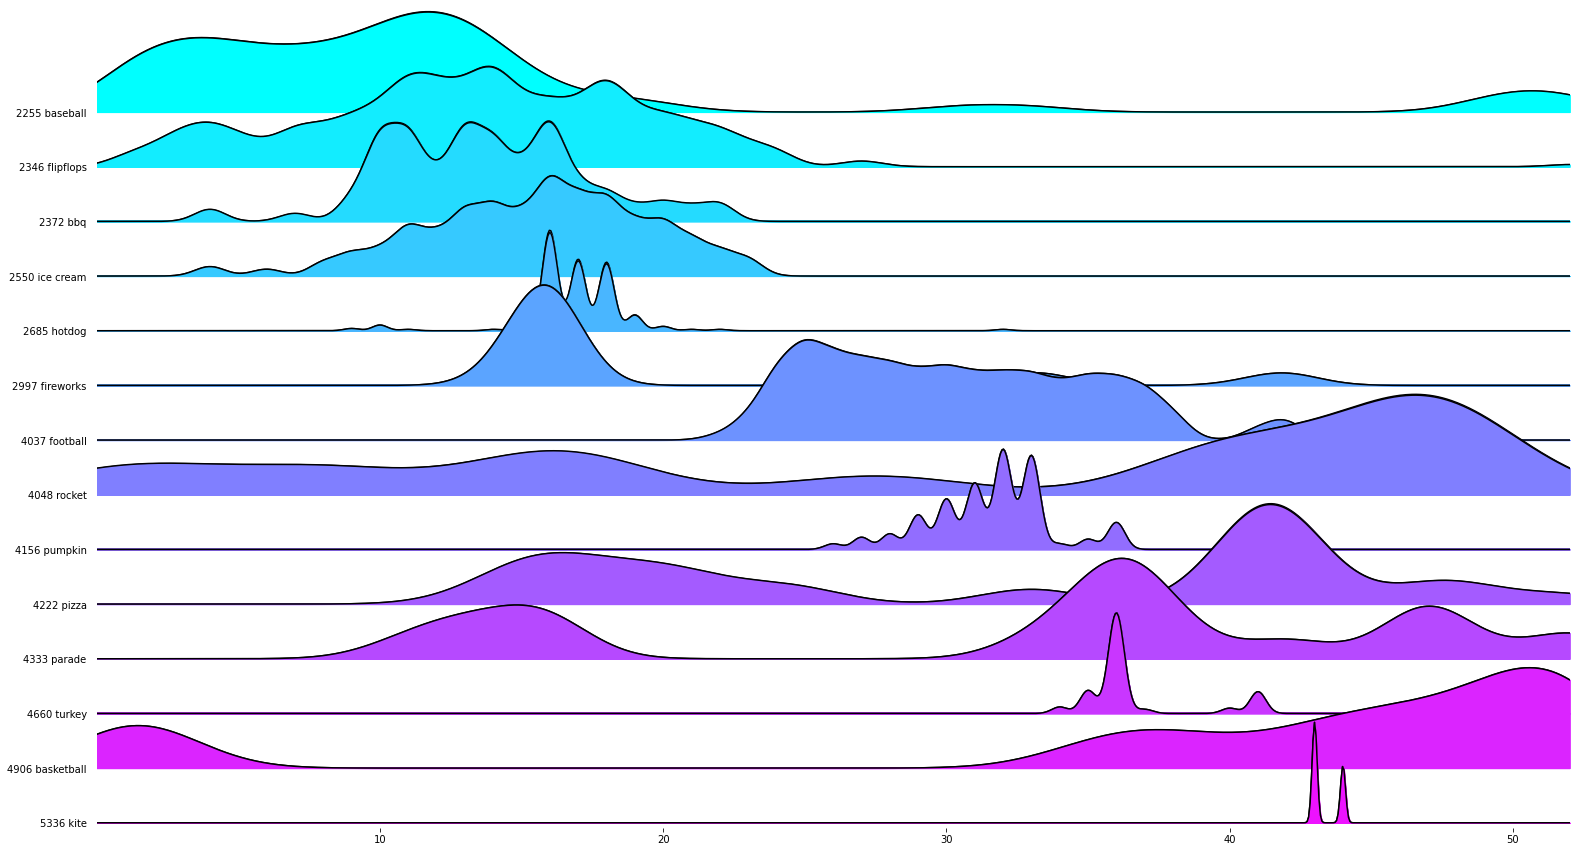

In [10]:
fig, axes = joypy.joyplot(df_flat
                          , column=['WeekNum', 'WeekNum_Rct']
                          , by='Flower_Tot'
                          , overlap=1.2
                          , fill=True
                          , figsize=(22,12)
                          , x_range = [0,52]
                          , colormap=cm.cool                         
                          , ylim='own'
                         )

plt.savefig('frank_jj.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c90f8df90>]],
      dtype=object)

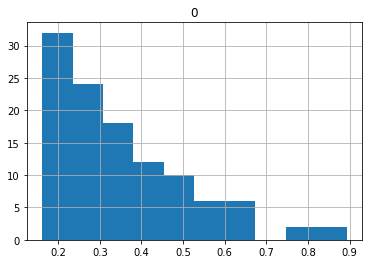

In [11]:

c = df_agg.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")



#df_slice = so[50:-13].to_frame()
#df_slice = so[:-13].to_frame()

df_slice = so[70:-len(topics)].to_frame()
df_slice.hist()

In [12]:
df_slice

,,0
fireworks,basketball,0.161320
basketball,fireworks,0.161320
hotdog,turkey,0.165512
turkey,hotdog,0.165512
hotdog,pizza,0.183183
...,...,...
flipflops,baseball,0.673335
ice cream,flipflops,0.759286
flipflops,ice cream,0.759286
bbq,ice cream,0.892854


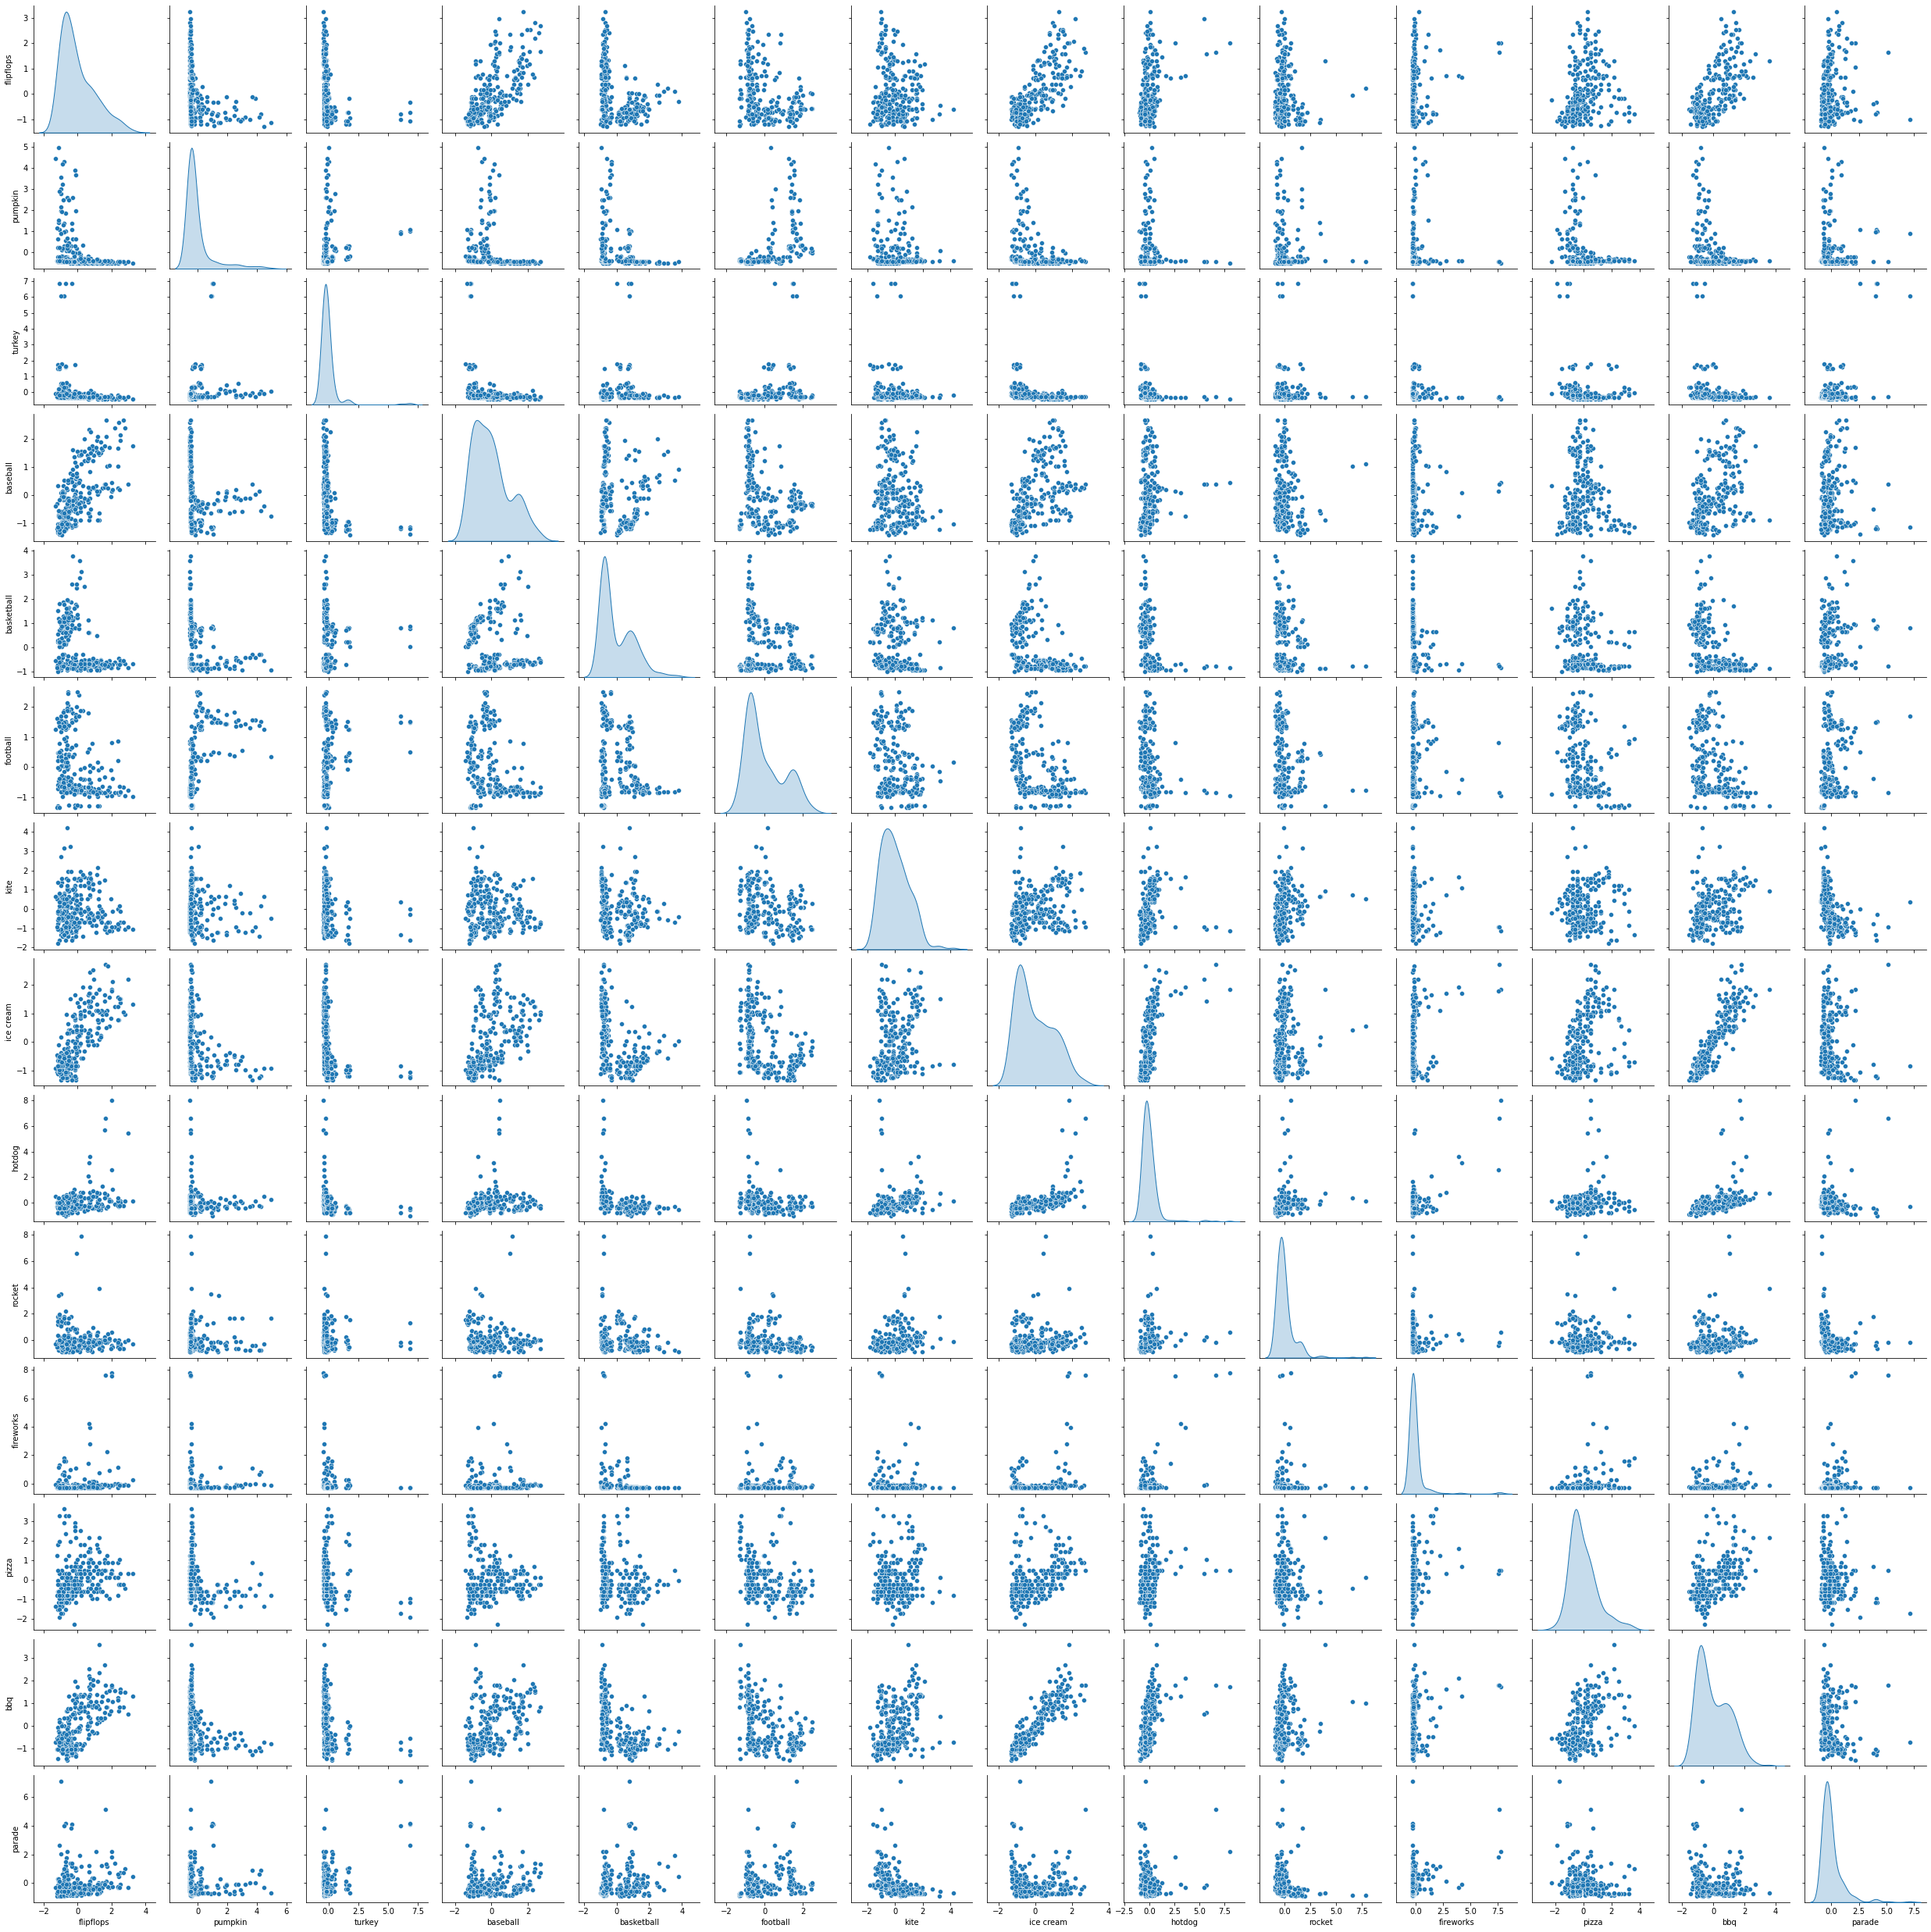

In [13]:
seaborn.pairplot(df_agg,diag_kind = 'kde',kind = 'scatter',palette = 'husl')

In [14]:
df_slice.reset_index(inplace=True)

In [15]:
df_slice.columns = ['source','target','weight']

In [16]:
df_slice['cost'] = numpy.random.randint(1, 6, df_slice.shape[0])

node degree clustering
fireworks 7 0.7619047619047619
basketball 8 0.7142857142857143
hotdog 8 0.8571428571428571
turkey 9 0.7222222222222222
pizza 9 0.8333333333333334
pumpkin 8 0.8571428571428571
baseball 6 1.0
football 11 0.5636363636363636
rocket 3 1.0
parade 6 0.3333333333333333
kite 5 0.6
bbq 11 0.6727272727272727
flipflops 10 0.7777777777777778
ice cream 11 0.6727272727272727
#/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-5a0f6152-93ff-48dc-9d91-9a022ee0f221.json
# GMT Sun Mar  6 20:55:22 2022
# 
fireworks basketball pizza flipflops bbq ice cream parade hotdog
basketball pizza parade pumpkin hotdog flipflops ice cream bbq
hotdog turkey pizza football flipflops bbq ice cream
turkey pizza pumpkin bbq flipflops football ice cream baseball parade
pizza flipflops pumpkin football ice cream bbq
pumpkin baseball bbq ice cream flipflops football
baseball football bbq ice cream flipflops
football rocket parade kite flipflops bbq

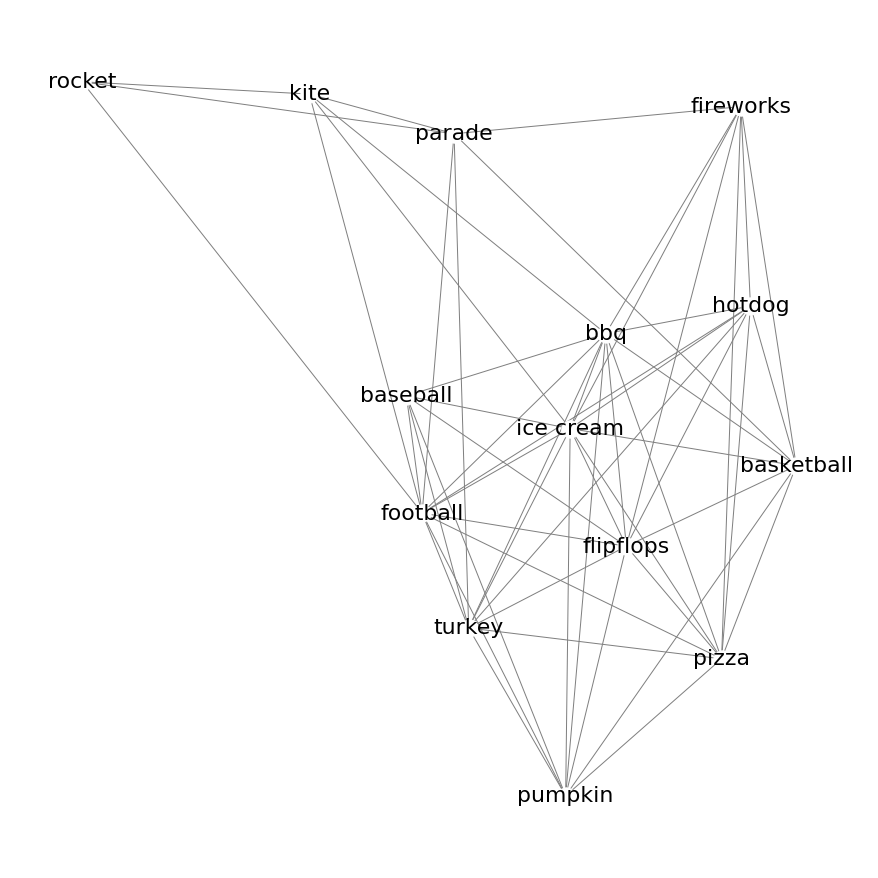

In [17]:
from networkx.algorithms.bipartite.basic import color
from networkx import *
import networkx as nx
import sys

n=10 # 10 nodes
m=20 # 20 edges

#G=gnm_random_graph(n,m)
#G=nx.from_pandas_dataframe(df_slice, 0, 'b', ['weight', 'cost'])
#G = nx.from_pandas_edgelist(df_slice, 'source', 'target', ['weight', 'cost'])
G = nx.from_pandas_edgelist(df_slice, 'source', 'target', ['weight'])


# some properties
print("node degree clustering")
for v in nodes(G):
    print(v,degree(G,v),clustering(G,v))

# print the adjacency list to terminal 
write_adjlist(G,sys.stdout)

plt.figure(3,figsize=(12,12)) 
draw(G
     ,with_labels=True
     ,edge_color='gray'
     ,node_color='white'
     ,font_size=22)


In [18]:
#df_slice.columns(["l","weight", "cost"])
G["football"]["baseball"]["weight"]


0.3778915659902189

In [19]:
# list nodes
G.nodes.items()

# edges
G.number_of_edges()

# print neighbors
for v in G.neighbors('rocket'):
  print(v)

football
parade
kite


In [20]:
# send openai question, receive response
def get_response(question):
  response = openai.Completion.create(
    engine="text-davinci-001",
    prompt=question,
    temperature=.01,
    max_tokens=250,
    top_p=1,
    frequency_penalty=50,
    presence_penalty=0
  )

  # process response
  response_choices = response["choices"]
  response_choice_text = response_choices[0]["text"]
  ''.join(e for e in response_choice_text if e.isalnum())
  response = response_choices[0]["text"].strip('\n')

  return response

In [21]:
responses = []


# retrieve 
retrieval = get_response('List similiar seasonal occurying concepts to baseball besides basketball and football and hockey and soccer')
responses.append(retrieval)

In [22]:
responses

['Volleyball, lacrosse']